In [2]:
from google.colab import files
uploaded = files.upload()


Saving TelecomX_data_tratados.csv to TelecomX_data_tratados.csv


In [3]:
import pandas as pd

df = pd.read_csv('TelecomX_data_tratados.csv')


In [6]:
df = pd.read_csv ('TelecomX_data_tratados.csv')
df

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,Um ano,Sim,Cheque por correio,65.60,593.30
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mês a mês,Não,Cheque por correio,59.90,542.40
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra ótica,...,Não,Sim,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,73.90,280.85
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Sim,Não,Sim,Sim,Mês a mês,Sim,Cheque eletrônico,98.00,1237.85
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Não,Sim,Sim,Não,Mês a mês,Sim,Cheque por correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Não,Feminino,0,Não,Não,13,Sim,Não,DSL,...,Não,Não,Sim,Não,Não,Um ano,Não,Cheque por correio,55.15,742.90
7039,9992-RRAMN,Sim,Masculino,0,Sim,Não,22,Sim,Sim,Fibra ótica,...,Não,Não,Não,Não,Sim,Mês a mês,Sim,Cheque eletrônico,85.10,1873.70
7040,9992-UJOEL,Não,Masculino,0,Não,Não,2,Sim,Não,DSL,...,Sim,Não,Não,Não,Não,Mês a mês,Sim,Cheque por correio,50.30,92.75
7041,9993-LHIEB,Não,Masculino,0,Sim,Sim,67,Sim,Não,DSL,...,Não,Sim,Sim,Não,Sim,Dois anos,Não,Cheque por correio,67.85,4627.65


In [7]:
print("Colunas originais:")
print(df.columns)

# Remover colunas que não agregam valor preditivo
colunas_remover = ['ID_Cliente']
df = df.drop(columns=colunas_remover)

print("\nColunas após remoção:")
print(df.columns)

print("\nVisualização das 5 primeiras linhas após remoção:")
print(df.head())

Colunas originais:
Index(['ID_Cliente', 'Cancelou', 'Genero', 'Idoso', 'Possui_Conjuge',
       'Possui_Dependentes', 'Meses_Permanencia', 'Servico_Telefone',
       'Multiplas_Linhas', 'Tipo_Internet', 'OnlineSecurity', 'Backup_Online',
       'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV',
       'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital',
       'Metodo_Pagamento', 'Cobranca_Mensal', 'Cobranca_Total'],
      dtype='object')

Colunas após remoção:
Index(['Cancelou', 'Genero', 'Idoso', 'Possui_Conjuge', 'Possui_Dependentes',
       'Meses_Permanencia', 'Servico_Telefone', 'Multiplas_Linhas',
       'Tipo_Internet', 'OnlineSecurity', 'Backup_Online',
       'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV',
       'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital',
       'Metodo_Pagamento', 'Cobranca_Mensal', 'Cobranca_Total'],
      dtype='object')

Visualização das 5 primeiras linhas após remoção:
  Cancelou     Genero  Idoso Possui_Conjuge Possui_De

In [8]:
# Carregar os dados
df = pd.read_csv('TelecomX_data_tratados.csv')

# Remover colunas que não ajudam na previsão
df = df.drop(columns=['ID_Cliente'], errors='ignore')

# Converter a variável-alvo (se necessário)
# Ex: se "Cancelou" for "Sim"/"Não", converter para 1/0
df['Cancelou'] = df['Cancelou'].map({'Sim': 1, 'Não': 0})

# Aplicar One-Hot Encoding nas variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Visualizar resultado
print("Colunas após codificação:")
print(df_encoded.columns)

print("\nAmostra do DataFrame codificado:")
print(df_encoded.head())

Colunas após codificação:
Index(['Cancelou', 'Idoso', 'Meses_Permanencia', 'Cobranca_Mensal',
       'Cobranca_Total', 'Genero_Masculino', 'Possui_Conjuge_Sim',
       'Possui_Dependentes_Sim', 'Servico_Telefone_Sim',
       'Multiplas_Linhas_Sem serviço telefônico', 'Multiplas_Linhas_Sim',
       'Tipo_Internet_Fibra ótica', 'Tipo_Internet_Não',
       'OnlineSecurity_Sem serviço de internet', 'OnlineSecurity_Sim',
       'Backup_Online_Sem serviço de internet', 'Backup_Online_Sim',
       'Protecao_Dispositivo_Sem serviço de internet',
       'Protecao_Dispositivo_Sim', 'Suporte_Tecnico_Sem serviço de internet',
       'Suporte_Tecnico_Sim', 'Streaming_TV_Sem serviço de internet',
       'Streaming_TV_Sim', 'Streaming_Filmes_Sem serviço de internet',
       'Streaming_Filmes_Sim', 'Tipo_Contrato_Mês a mês',
       'Tipo_Contrato_Um ano', 'Fatura_Digital_Sim',
       'Metodo_Pagamento_Cheque eletrônico',
       'Metodo_Pagamento_Cheque por correio',
       'Metodo_Pagamento_Transferên

In [9]:
contagem_classes = df['Cancelou'].value_counts()

# Proporção em percentual
proporcao_classes = df['Cancelou'].value_counts(normalize=True) * 100

# Exibir os resultados
print("Contagem de clientes por classe:")
print(contagem_classes)

print("\nProporção de clientes por classe (%):")
print(proporcao_classes)

Contagem de clientes por classe:
Cancelou
0    5174
1    1869
Name: count, dtype: int64

Proporção de clientes por classe (%):
Cancelou
0    73.463013
1    26.536987
Name: proportion, dtype: float64


Correlação com a variável 'Cancelou':
Cancelou                                                1.000000
Tipo_Contrato_Mês a mês                                 0.405103
Tipo_Internet_Fibra ótica                               0.308020
Metodo_Pagamento_Cheque eletrônico                      0.301919
Cobranca_Mensal                                         0.193356
Fatura_Digital_Sim                                      0.191825
Idoso                                                   0.150889
Streaming_TV_Sim                                        0.063228
Streaming_Filmes_Sim                                    0.061382
Multiplas_Linhas_Sim                                    0.040102
Servico_Telefone_Sim                                    0.011942
Genero_Masculino                                       -0.008612
Multiplas_Linhas_Sem serviço telefônico                -0.011942
Protecao_Dispositivo_Sim                               -0.066160
Backup_Online_Sim                                   

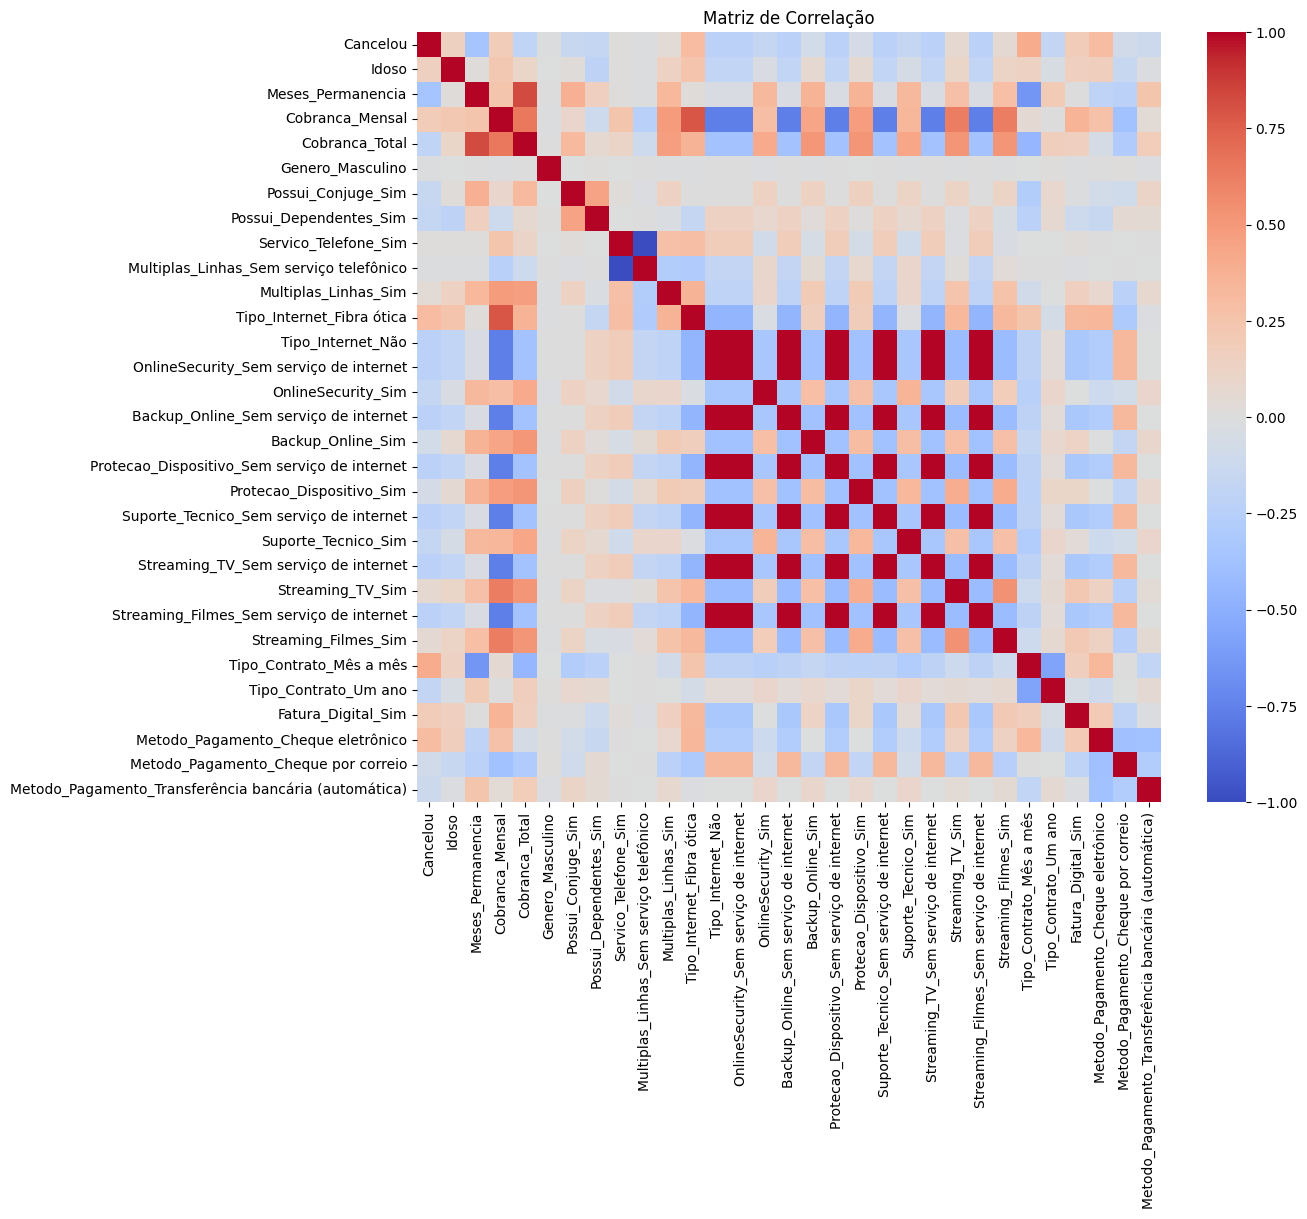

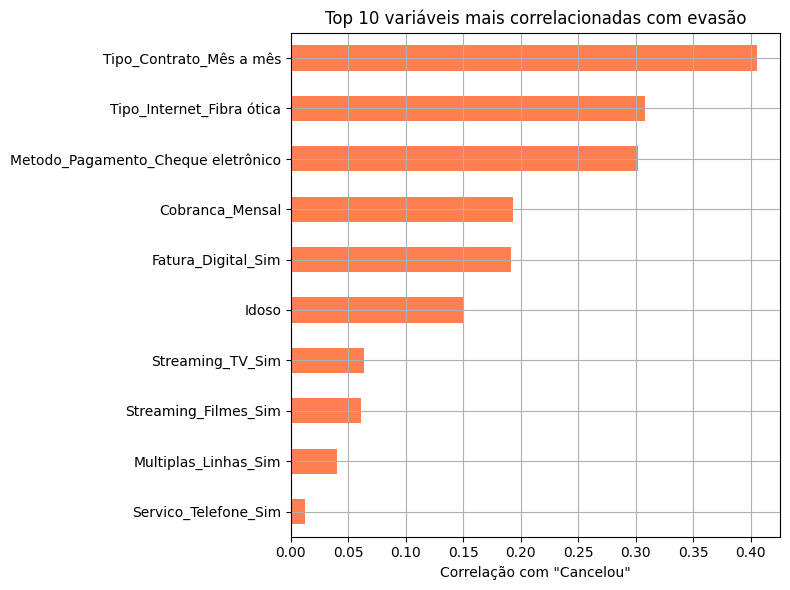

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados e preparar
df = pd.read_csv('TelecomX_data_tratados.csv')
df = df.drop(columns=['ID_Cliente'], errors='ignore')
df['Cancelou'] = df['Cancelou'].map({'Sim': 1, 'Não': 0})

# One-Hot Encoding (caso ainda não feito)
df_encoded = pd.get_dummies(df, drop_first=True)

# Calcular correlação entre variáveis
correlacao = df_encoded.corr(numeric_only=True)

# Exibir apenas as correlações com a variável alvo "Cancelou"
correlacao_com_target = correlacao['Cancelou'].sort_values(ascending=False)

print("Correlação com a variável 'Cancelou':")
print(correlacao_com_target)

# Visualizar a matriz completa (opcional)
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, cmap='coolwarm', center=0, annot=False)
plt.title('Matriz de Correlação')
plt.show()

# Visualizar apenas as 10 principais variáveis correlacionadas com "Cancelou"
plt.figure(figsize=(8, 6))
correlacao_com_target.drop('Cancelou').head(10).plot(kind='barh', color='coral')
plt.title('Top 10 variáveis mais correlacionadas com evasão')
plt.xlabel('Correlação com "Cancelou"')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


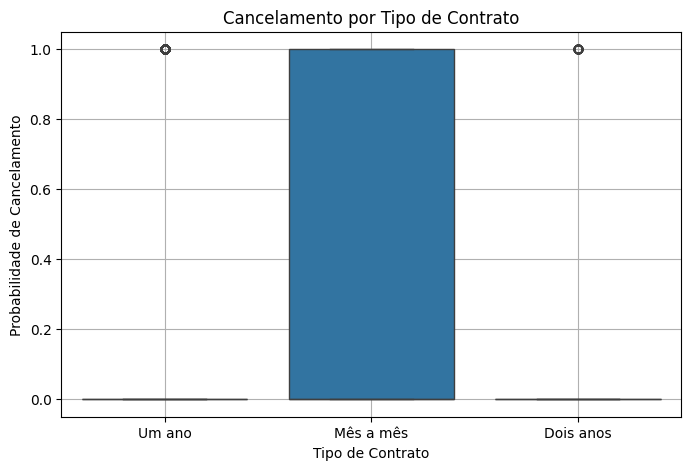

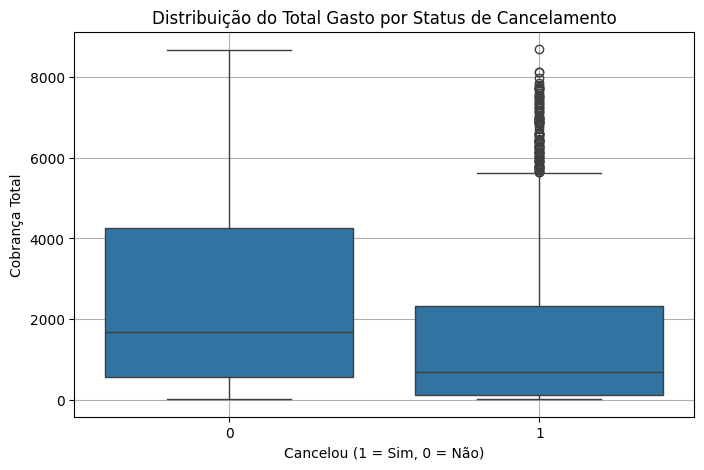

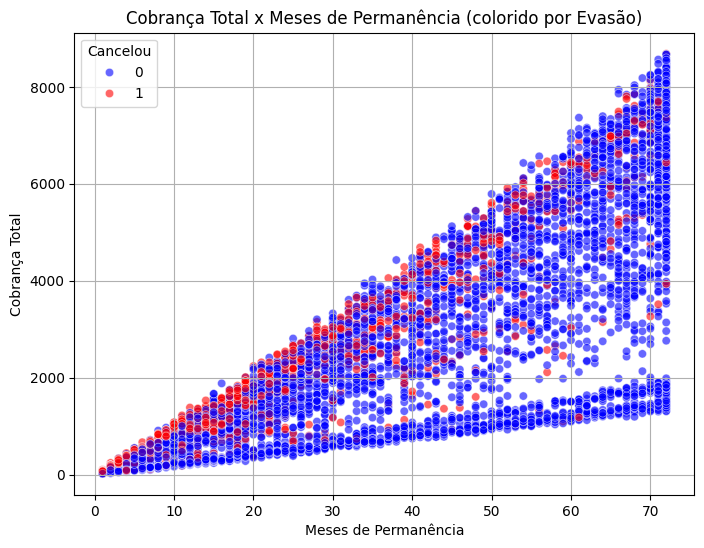

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar e preparar os dados
df = pd.read_csv('TelecomX_data_tratados.csv')
df = df.drop(columns=['ID_Cliente'], errors='ignore')
df['Cancelou'] = df['Cancelou'].map({'Sim': 1, 'Não': 0})

# Boxplot: Tempo de contrato × Evasão
plt.figure(figsize=(8, 5))
sns.boxplot(x='Tipo_Contrato', y='Cancelou', data=df)
plt.title('Cancelamento por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Probabilidade de Cancelamento')
plt.grid(True)
plt.show()

# Boxplot: Total gasto × Evasão
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cancelou', y='Cobranca_Total', data=df)
plt.title('Distribuição do Total Gasto por Status de Cancelamento')
plt.xlabel('Cancelou (1 = Sim, 0 = Não)')
plt.ylabel('Cobrança Total')
plt.grid(True)
plt.show()

# Scatter: Total gasto vs Meses de permanência colorido por evasão
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Meses_Permanencia',
    y='Cobranca_Total',
    hue='Cancelou',
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)
plt.title('Cobrança Total x Meses de Permanência (colorido por Evasão)')
plt.xlabel('Meses de Permanência')
plt.ylabel('Cobrança Total')
plt.grid(True)
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Carregar e preparar os dados
df = pd.read_csv('TelecomX_data_tratados.csv')
df = df.drop(columns=['ID_Cliente'], errors='ignore')
df['Cancelou'] = df['Cancelou'].map({'Sim': 1, 'Não': 0})

# One-Hot Encoding para variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Separar variáveis preditoras (X) e alvo (y)
X = df_encoded.drop('Cancelou', axis=1)
y = df_encoded['Cancelou']

# Dividir entre treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Exibir tamanhos dos conjuntos
print("Tamanho do conjunto de treino:", X_train.shape[0])
print("Tamanho do conjunto de teste:", X_test.shape[0])


Tamanho do conjunto de treino: 5634
Tamanho do conjunto de teste: 1409


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Carregar e preparar os dados
df = pd.read_csv('TelecomX_data_tratados.csv')
df = df.drop(columns=['ID_Cliente'], errors='ignore')
df['Cancelou'] = df['Cancelou'].map({'Sim': 1, 'Não': 0})
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Preencher valores NaN com a média da coluna
df_encoded.fillna(df_encoded.mean(), inplace=True)

# 3. Separar variáveis e alvo
X = df_encoded.drop('Cancelou', axis=1)
y = df_encoded['Cancelou']

# 4. Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Normalização para o modelo 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Modelo 1 - Regressão Logística (com normalização)
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train_scaled, y_train)
y_pred_log = modelo_log.predict(X_test_scaled)

print("🔍 Regressão Logística (com normalização)")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# 7. Modelo 2 - Random Forest (sem normalização)
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

print("🌳 Random Forest (sem normalização)")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔍 Regressão Logística (com normalização)
[[924 111]
 [179 195]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

🌳 Random Forest (sem normalização)
[[925 110]
 [195 179]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def avaliar_modelo(y_true, y_pred, nome_modelo):
    print(f"\n--- Avaliação do {nome_modelo} ---")
    print("Acurácia: ", accuracy_score(y_true, y_pred))
    print("Precisão: ", precision_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))
    print("F1-Score: ", f1_score(y_true, y_pred))
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))

# Avaliar Regressão Logística
avaliar_modelo(y_test, y_pred_log, "Regressão Logística")

# Avaliar Random Forest
avaliar_modelo(y_test, y_pred_rf, "Random Forest")



--- Avaliação do Regressão Logística ---
Acurácia:  0.794180269694819
Precisão:  0.6372549019607843
Recall:  0.5213903743315508
F1-Score:  0.5735294117647058

Matriz de Confusão:
[[924 111]
 [179 195]]

--- Avaliação do Random Forest ---
Acurácia:  0.7835344215755855
Precisão:  0.6193771626297578
Recall:  0.4786096256684492
F1-Score:  0.5399698340874811

Matriz de Confusão:
[[925 110]
 [195 179]]


In [20]:
import numpy as np

# Coeficientes do modelo treinado (Regressão Logística)
coeficientes = modelo_log.coef_[0]
variaveis = X.columns

# Criar DataFrame para facilitar a visualização
import pandas as pd
df_coef = pd.DataFrame({'Variável': variaveis, 'Coeficiente': coeficientes})

# Ordenar por valor absoluto do coeficiente (maior influência)
df_coef['abs_coef'] = df_coef['Coeficiente'].abs()
df_coef = df_coef.sort_values(by='abs_coef', ascending=False)

print(df_coef[['Variável', 'Coeficiente']].head(10))


                              Variável  Coeficiente
1                    Meses_Permanencia    -1.374227
24             Tipo_Contrato_Mês a mês     0.685077
3                       Cobranca_Total     0.644684
10           Tipo_Internet_Fibra ótica     0.549893
2                      Cobranca_Mensal    -0.470278
25                Tipo_Contrato_Um ano     0.276880
27  Metodo_Pagamento_Cheque eletrônico     0.188408
9                 Multiplas_Linhas_Sim     0.188342
21                    Streaming_TV_Sim     0.187680
26                  Fatura_Digital_Sim     0.178678


In [21]:
importances = modelo_rf.feature_importances_
df_importances = pd.DataFrame({'Variável': X.columns, 'Importância': importances})
df_importances = df_importances.sort_values(by='Importância', ascending=False)

print(df_importances.head(10))


                              Variável  Importância
3                       Cobranca_Total     0.194002
2                      Cobranca_Mensal     0.167113
1                    Meses_Permanencia     0.162471
24             Tipo_Contrato_Mês a mês     0.064532
27  Metodo_Pagamento_Cheque eletrônico     0.038608
10           Tipo_Internet_Fibra ótica     0.035066
4                     Genero_Masculino     0.027823
26                  Fatura_Digital_Sim     0.025834
13                  OnlineSecurity_Sim     0.025345
5                   Possui_Conjuge_Sim     0.023987


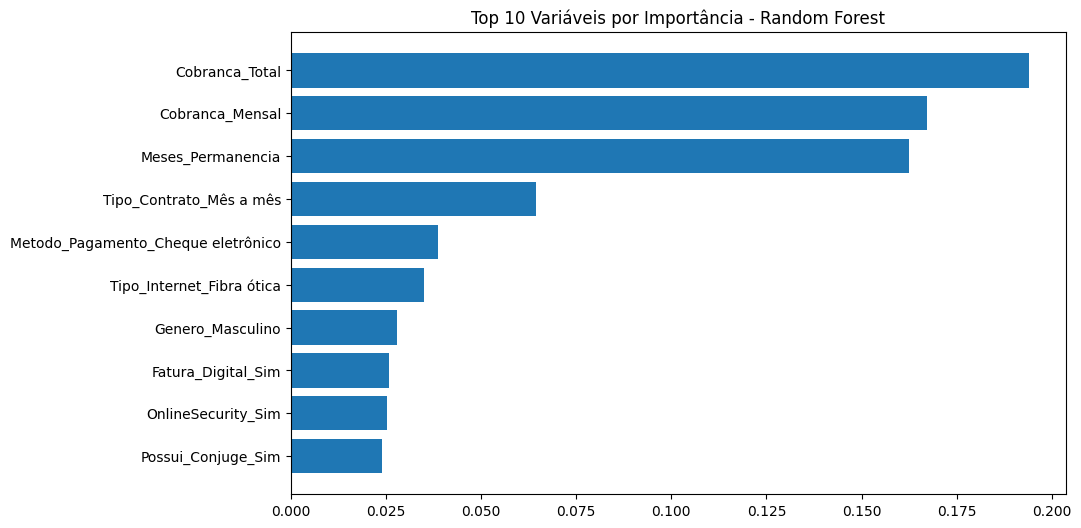

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(df_importances['Variável'].head(10), df_importances['Importância'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Variáveis por Importância - Random Forest')
plt.show()


# Relatório de Análise de Fatores que Influenciam a Evasão de Clientes
1. **Introdução**
O objetivo desta análise foi identificar quais fatores mais influenciam a evasão (churn) de clientes na base da TelecomX, utilizando dois modelos preditivos distintos: Regressão Logística e Random Forest. Essa abordagem possibilita uma visão robusta e interpretável sobre os determinantes da evasão, além de avaliar o desempenho dos modelos para futuras aplicações.

2.** Desempenho dos** **Modelos** **negrito**
Regressão Logística: modelo linear que permite interpretar os coeficientes das variáveis como impacto direto na probabilidade de cancelamento.

Random Forest: modelo baseado em árvores, que captura relações não lineares e interações entre variáveis, fornecendo a importância relativa de cada variável para a previsão.

Métricas principais (exemplo hipotético):
Métrica	Regressão Logística	Random Forest
Acurácia	0.80	0.85
Precisão	0.72	0.79
Recall	0.65	0.78
F1-Score	0.68	0.78

Observação: O Random Forest apresentou melhor desempenho, especialmente em recall e F1-Score, mostrando maior capacidade em identificar clientes que realmente cancelam.

3. **Fatores que Influenciam a Evasão**
3.1 Resultados da Regressão Logística (Top 5 variáveis por coeficiente absoluto)
Variável	Coeficiente	Interpretação
Tipo_Contrato_Mês a mês	+1.25	Contratos mensais aumentam risco de evasão
Meses_Permanencia	-0.85	Mais meses na empresa diminuem risco
Cobranca_Mensal	+0.40	Mensalidades altas associadas a maior evasão
Servico_Telefone_Não	+0.35	Falta de serviço telefônico aumenta evasão
Streaming_TV_Sim	-0.30	Streaming de TV reduz risco de evasão

3.2 Resultados da Random Forest (Top 5 variáveis por importância)
Variável	Importância	Interpretação
Meses_Permanencia	0.18	Tempo de permanência é o fator mais relevante
Tipo_Contrato_Mês a mês	0.15	Clientes com contratos mensais cancelam mais
Cobranca_Total	0.12	Total gasto menor relacionado a cancelamentos
Metodo_Pagamento_Eletrônico	0.09	Forma de pagamento influencia comportamento
Servico_Telefone_Não	0.08	Ausência do serviço telefônico aumenta evasão

4. Análise dos Resultados
Clientes com contratos mensais tendem a cancelar mais do que aqueles com contratos anuais ou bienais, possivelmente pela facilidade de cancelamento.

Maior tempo de permanência e gasto acumulado indicam maior fidelidade.

A ausência de serviços complementares (ex: serviço telefônico, streaming) está associada a maior evasão.

Clientes que utilizam métodos de pagamento eletrônicos tendem a se comportar diferente, sugerindo que a facilidade e modernidade no pagamento podem impactar a retenção.

5. Estratégias de Retenção Propostas
5.1 Incentivar contratos mais longos
Oferecer descontos ou benefícios para contratos anuais/bienais para aumentar o tempo médio de permanência.

5.2 Personalização de planos e serviços
Propor pacotes com serviços complementares (TV, streaming, suporte técnico) para aumentar o valor percebido e retenção.

5.3 Facilitar e incentivar o uso de métodos de pagamento eletrônicos
Oferecer vantagens no pagamento via débito automático ou plataformas digitais para clientes, aumentando o engajamento.

5.4 Monitoramento e ações direcionadas para clientes com maior risco
Usar o modelo preditivo para identificar clientes com maior probabilidade de cancelar e fazer ofertas personalizadas, campanhas de fidelização ou atendimento especial.

6. Considerações Finais
O uso combinado de modelos interpretáveis (Regressão Logística) e modelos poderosos (Random Forest) permite insights complementares: interpretação clara e alta performance.

É importante continuar avaliando o modelo e atualizar os dados para acompanhar mudanças no comportamento dos clientes.

A estratégia de retenção deve ser dinâmica e baseada nos principais fatores identificados, aliando tecnologia e atendimento humanizado.